In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv('portland_housing.csv')

In [7]:
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [10]:
df['size_m2'] = df['Size']*0.093

In [12]:
df.head()

,Size,Bedrooms,Price,size_m2
0,2104,3,399900,195.672
1,1600,3,329900,148.800
2,2400,3,369000,223.200
3,1416,2,232000,131.688
4,3000,4,539900,279.000


In [14]:
df.describe()

,Size,Bedrooms,Price,size_m2
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574,186.063319
std,794.702354,0.760982,125039.899586,73.907319
min,852.000000,1.000000,169900.000000,79.236000
25%,1432.000000,3.000000,249900.000000,133.176000
50%,1888.000000,3.000000,299900.000000,175.584000
75%,2269.000000,4.000000,384450.000000,211.017000
max,4478.000000,5.000000,699900.000000,416.454000


In [16]:
X = df[['size_m2']]
y= df['Price']

In [19]:
y


0     399900
1     329900
2     369000
3     232000
4     539900
5     299900
6     314900
7     198999
8     212000
9     242500
10    239999
11    347000
12    329999
13    699900
14    259900
15    449900
16    299900
17    199900
18    499998
19    599000
20    252900
21    255000
22    242900
23    259900
24    573900
25    249900
26    464500
27    469000
28    475000
29    299900
30    349900
31    169900
32    314900
33    579900
34    285900
35    249900
36    229900
37    345000
38    549000
39    287000
40    368500
41    329900
42    314000
43    299000
44    179900
45    299900
46    239500
Name: Price, dtype: int64

In [20]:
X[:5]

,size_m2
0,195.672
1,148.800
2,223.200
3,131.688
4,279.000


In [21]:
X.head()

,size_m2
0,195.672
1,148.800
2,223.200
3,131.688
4,279.000


In [22]:
X.head(20)

,size_m2
0,195.672
1,148.800
2,223.200
3,131.688
4,279.000
5,184.605
6,142.662
7,132.711
8,128.340
9,138.942


In [23]:
y[:5]

0    399900
1    329900
2    369000
3    232000
4    539900
Name: Price, dtype: int64

In [24]:
y.values[:5]

array([399900, 329900, 369000, 232000, 539900])

In [25]:
model = LinearRegression()

In [26]:
model.fit(X,y)

LinearRegression()

In [27]:
model.coef_

array([1446.50847011])

In [28]:
model.intercept_

71270.49244872894

In [29]:
predict_data = np.array([[148.8],[195.6]])

In [30]:
predict_data

array([[148.8],
       [195.6]])

In [31]:
predict = model.predict(predict_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [32]:
predict

array([286510.95280112, 354207.54920227])

In [46]:
X = df[['size_m2', 'Bedrooms','Size']]

In [47]:
y = df['Price']

In [48]:
model = LinearRegression()

In [49]:
model.fit(X, y)

LinearRegression()

In [50]:
model.intercept_

89597.90954280228

In [51]:
model.coef_

array([   12.83557777, -8738.01911233,   138.01696528])

In [52]:
predict_data = np.array([[148.8, 2, 2000],[195.6, 4, 2500]])

In [53]:
model.predict(predict_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([350065.73586029, 402198.88531778])

In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
df.head()

,Size,Bedrooms,Price,size_m2
0,2104,3,399900,195.672
1,1600,3,329900,148.800
2,2400,3,369000,223.200
3,1416,2,232000,131.688
4,3000,4,539900,279.000


In [56]:
X = df[['size_m2']]

In [57]:
y = df['Price']

In [58]:
X.head()

,size_m2
0,195.672
1,148.800
2,223.200
3,131.688
4,279.000


In [59]:
y.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: Price, dtype: int64

In [60]:
poly = PolynomialFeatures(degree=3)

In [61]:
X_poly = poly.fit_transform(X)

TypeError: ignored

In [71]:
X_poly
X_poly_df = pd.DataFrame(X_poly, columns = ['x0','x1','x2','x3'])


In [72]:
# df_concat = X.join(X_poly)
df = pd.concat([X, X_poly_df], axis=1, join='outer')

In [73]:
df


,size_m2,x0,x1,x2,x3
0,195.672,1.0,195.672,38287.531584,7.491798e+06
1,148.800,1.0,148.800,22141.440000,3.294646e+06
2,223.200,1.0,223.200,49818.240000,1.111943e+07
3,131.688,1.0,131.688,17341.729344,2.283698e+06
4,279.000,1.0,279.000,77841.000000,2.171764e+07
5,184.605,1.0,184.605,34079.006025,6.291155e+06
6,142.662,1.0,142.662,20352.446244,2.903521e+06
7,132.711,1.0,132.711,17612.209521,2.337334e+06
8,128.340,1.0,128.340,16471.155600,2.113908e+06
9,138.942,1.0,138.942,19304.879364,2.682259e+06


In [74]:
model = LinearRegression()

In [75]:
model.fit(X_poly, y)

LinearRegression()

In [76]:
model.coef_

array([ 0.00000000e+00, -1.15973583e+03,  1.22777651e+01, -1.71938558e-02])

In [77]:
model.intercept_

236407.03596495363

In [78]:
X_poly_df

,x0,x1,x2,x3
0,1.0,195.672,38287.531584,7.491798e+06
1,1.0,148.800,22141.440000,3.294646e+06
2,1.0,223.200,49818.240000,1.111943e+07
3,1.0,131.688,17341.729344,2.283698e+06
4,1.0,279.000,77841.000000,2.171764e+07
5,1.0,184.605,34079.006025,6.291155e+06
6,1.0,142.662,20352.446244,2.903521e+06
7,1.0,132.711,17612.209521,2.337334e+06
8,1.0,128.340,16471.155600,2.113908e+06
9,1.0,138.942,19304.879364,2.682259e+06


In [86]:
sizes = np.arange(70, 351)

In [85]:
sizes

array([ 70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
       187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
       200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
       213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
       226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238,
       239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 25

In [93]:
sizes_poly = poly.transform([sizes])

In [94]:
sizes_poly

array([[1.000000e+00, 7.000000e+01, 7.100000e+01, ..., 4.263035e+07,
        4.275250e+07, 4.287500e+07]])

ValueError: ignored

In [96]:
df_wine = pd.read_csv('wine.csv')

In [97]:
df_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [99]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [101]:
df_wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [102]:
model = LinearRegression()

In [104]:
y = df_wine['quality']

In [105]:
X = df_wine.drop(['quality'], axis=1)

In [106]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [107]:
model = LinearRegression()

In [108]:
model.fit(X, y)

LinearRegression()

In [109]:
model.intercept_, model.coef_

(21.96520844944842,
 array([ 2.49905527e-02, -1.08359026e+00, -1.82563948e-01,  1.63312698e-02,
        -1.87422516e+00,  4.36133331e-03, -3.26457970e-03, -1.78811638e+01,
        -4.13653144e-01,  9.16334413e-01,  2.76197699e-01]))

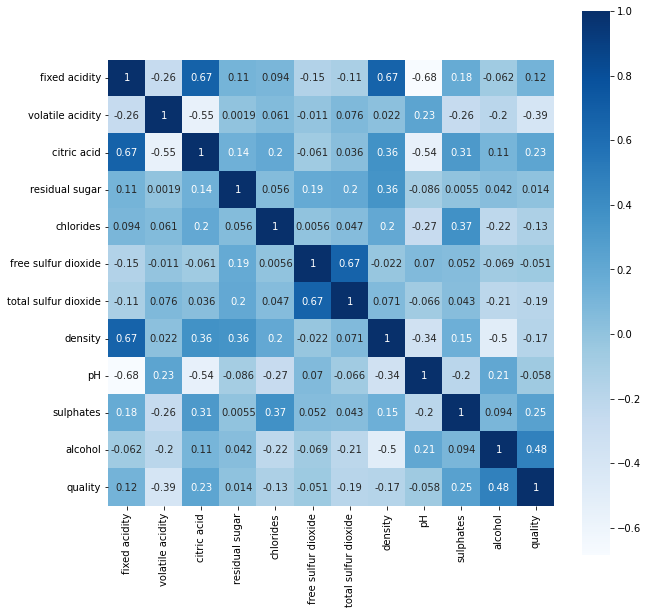

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df_wine.corr()
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')